# Projet : Prédiction des débits dans le réseau d’égouts en fonction des prévisions météorologiques et des précipitations enregistrées 

___

Dans un premier temps, j'ai fait l'étude seulement pour prédire le débit BHFI0010B. 


### Sommaire:
___

**[I.Importer le Dataset(les débits et les précipitations) et le diviser en un vecteur y et une matrice X](#section_I)**   
**[II.Entraînement d'un MLP(Perceptron multicouche)](#section_II)**  
  [II.1. Le modéle choisi](#section_II.1)   
  [II.2. Fonction de perte](#section_II.2)  
**[III.Résultat sur toute la base de données de test](#section_III)**  
**[IV. Prediction, Comparaison entre le débit observé et prédit](#section_IV)**  
  [IV.1. Méthode 1: Coefficient d'efficacité de Nash–Sutcliffe](#section_IV.1)  
  [IV.2. Méthode 2: L'erreur relative](#section_IV.2)   
**[VI. Références](#section_VI)**  






<a id="section_I"></a>
### I. Importer le Dataset(les débits et les précipitations) et le diviser en un vecteur y et une matrice X
___
la bibliothéque tensorflow implémente des méthodes d’apprentissage automatique basées sur le principe des réseaux de neurones profonds.
keras : encapsule l’accès aux fonctions proposées par plusieurs librairies de machine learning, en particulier Tensorflow.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

C:\Users\Lotfi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Lotfi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Lotfi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Lotfi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
# Perceptron multicouche pour le problème de regression avec mse (erreur quadratique moyenne)
from keras.optimizers import RMSprop, Adam
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow import keras

Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import BatchNormalization
from keras.layers.normalization  import BatchNormalization

Importer les précipitations de 51 stations et le débit BHFI0010B.

In [4]:
import matplotlib.pyplot as plt
preci = pd.read_excel("../Projet_v2/precipitations_1mois.xlsx")
reg = pd.read_excel("../Projet_v2/debit_un_mois.xlsx")
debit1 = reg['BHFI0010B']

Partitionner les données entre observation pour apprentissage(90%), et test (10%).

In [5]:
X_train, X_test, y_train, y_test = train_test_split(preci,debit1 , test_size=0.1,shuffle=False)

In [6]:
# Normaliser les données d'entrainement.
# Initialiser le 'Scaler'
scaler = StandardScaler() 

scaler.fit(X_train) 

StandardScaler(copy=True, with_mean=True, with_std=True)

<a id="section_I"></a>
### II.Entraînement d'un MLP(Perceptron multicouche)
___

<a id="section_II.1"></a>
#### II.1. Le modéle choisi

In [8]:
# Définier le modéle
# instantier le modéle
# La classe Sequential est une structure, initialement vide, qui permet de définir un empilement de couches de neurones
model = Sequential()

# Ce morceau est la couche d'entrée
model.add(Dense(20,activation='sigmoid',input_shape=(51,),kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

# les couches intermédiaires 
model.add(Dense(25, activation='relu',))
model.add(Dropout(0.3))
model.add(Dense(25, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='relu'))

model.add(Dense(64,  activation='sigmoid'))
model.add(BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
 
model.add(Dense(64, activation='sigmoid'))
model.add(BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(25, activation='sigmoid'))
model.add(BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None))

# Ce morceau est la couche de sortie . 1 car, on a va utilisé un seule débit pour la sortie
model.add(Dense(1, activation='relu'))
model.summary()

C:\Users\Lotfi\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)`
C:\Users\Lotfi\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)`
C:\Users\Lotfi\anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)`


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 20)                1040      
_________________________________________________________________
dropout_6 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 25)                525       
_________________________________________________________________
dropout_7 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 25)                650       
_________________________________________________________________
dropout_8 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

<a id="section_II.2"></a>
#### II.2. Fonction de perte

J'ai choisi comme fonction de perte 'erreur quadratique moyenne', aussi j'ai tenté par la fonction 'erreur moyenne absolue'

In [9]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile( #loss=tf.keras.losses.MeanSquaredError(),
              loss='mean_absolute_error',
              optimizer=Adam(lr=1e-4),
              metrics=['mse'])

In [10]:
batch_size = 25
epochs = 100

In [11]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data = (X_test, y_test))


Train on 8036 samples, validate on 893 samples
Epoch 1/100
 - 17s - loss: 0.4669 - mse: 0.5321 - val_loss: 0.0891 - val_mse: 0.0120
Epoch 2/100
 - 6s - loss: 0.3259 - mse: 0.2605 - val_loss: 0.0914 - val_mse: 0.0125
Epoch 3/100
 - 5s - loss: 0.2955 - mse: 0.2303 - val_loss: 0.0950 - val_mse: 0.0133
Epoch 4/100
 - 5s - loss: 0.2759 - mse: 0.2196 - val_loss: 0.0465 - val_mse: 0.0045
Epoch 5/100
 - 5s - loss: 0.2590 - mse: 0.2147 - val_loss: 0.0447 - val_mse: 0.0044
Epoch 6/100
 - 5s - loss: 0.2465 - mse: 0.2051 - val_loss: 0.0426 - val_mse: 0.0045
Epoch 7/100
 - 5s - loss: 0.2341 - mse: 0.1987 - val_loss: 0.0607 - val_mse: 0.0061
Epoch 8/100
 - 6s - loss: 0.2295 - mse: 0.2003 - val_loss: 0.0476 - val_mse: 0.0045
Epoch 9/100
 - 5s - loss: 0.2164 - mse: 0.1907 - val_loss: 0.0620 - val_mse: 0.0063
Epoch 10/100
 - 6s - loss: 0.2043 - mse: 0.1874 - val_loss: 0.0457 - val_mse: 0.0045
Epoch 11/100
 - 6s - loss: 0.1927 - mse: 0.1813 - val_loss: 0.0464 - val_mse: 0.0045
Epoch 12/100
 - 6s - loss

Epoch 95/100
 - 5s - loss: 0.0850 - mse: 0.1338 - val_loss: 0.0420 - val_mse: 0.0046
Epoch 96/100
 - 5s - loss: 0.0848 - mse: 0.1336 - val_loss: 0.0415 - val_mse: 0.0047
Epoch 97/100
 - 6s - loss: 0.0849 - mse: 0.1336 - val_loss: 0.0428 - val_mse: 0.0045
Epoch 98/100
 - 6s - loss: 0.0848 - mse: 0.1337 - val_loss: 0.0446 - val_mse: 0.0044
Epoch 99/100
 - 5s - loss: 0.0848 - mse: 0.1336 - val_loss: 0.0427 - val_mse: 0.0045
Epoch 100/100
 - 5s - loss: 0.0854 - mse: 0.1338 - val_loss: 0.0417 - val_mse: 0.0046


<a id="section_III"></a>
#### III.Résultat sur toute la base de données de test


La figure suivante présente la fonction de perte pour l'ensemble d'entraînement et l'ensemble de test en fonction de nombre d'itération pour le débit BHFI0010B. 

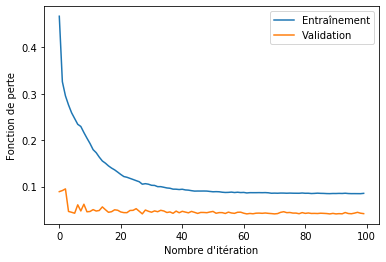

In [12]:
plt.plot(history.history['loss'], label='Entraînement')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.xlabel('Nombre d\'itération')
plt.ylabel('Fonction de perte')
plt.savefig('Debit_BHFI0010B.png')

In [13]:
# Taux d'erreur.
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])


Test loss: 0.04173739303178743


<a id="section_IV"></a>
#### IV. Prediction, Comparaison entre modele observé et prédit



In [14]:
prediction= model.predict(X_test)

In [15]:
prediction

array([[0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.3744354 ],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.37485096],
       [0.374

In [16]:
y_test

8036    0.382467
8037    0.382348
8038    0.382229
8039    0.382110
8040    0.381991
          ...   
8924    0.348855
8925    0.346566
8926    0.344277
8927    0.341987
8928    0.339698
Name: BHFI0010B, Length: 893, dtype: float64

<a id="section_IV.1"></a>
#### IV.1. Méthode 1: Coefficient d'efficacité de Nash–Sutcliffe

On calcule la valeur moyenne de l'ensemble de test pour chaque débits

In [17]:
mean_debit1 = 0
mean_debit1 = sum(np.array(y_test))/len(np.array(y_test))

On utilise cette formule pour calculer le coefficient d'efficacité de Nash-Sutcliffe .

$$ \text{NSE}  = 1 - \frac{\sum_{n=1}^{m} |Q_m - Q_o|}{\sum_{n=1}^{m} |Q_{mean} - Q_o| }.$$

In [18]:
err1 = np.ones(len(y_test))
err2 = np.ones(len(y_test))
NSE = 1
for i in range(len(y_test)) :
        err1[i] = abs(prediction[i]- np.array(y_test)[i])
        err2[i] = abs(mean_debit1 - np.array(y_test)[i])
            
            
NSE = 1- (sum(err1)/sum(err2))

NSE

0.07089615160777474

<a id="section_IV.2"></a>
#### IV.2. Méthode 2: L'erreur relative

On calcule l'erreur relative pour le débits BHFI0010B.

In [19]:
err1 = np.ones(len(y_test))
er2 = np.ones(len(y_test))
erreur_relative = 0
 
for i in range(len(y_test)) :
     err1[i] = (abs(prediction[i] - np.array(y_test)[i])/np.array(y_test)[i])*100
             
erreur_relative = sum(err1)/len(err1)


erreur_relative

12.685644072331362

##### On trace le débit obsevé et prédit en fonction du temps

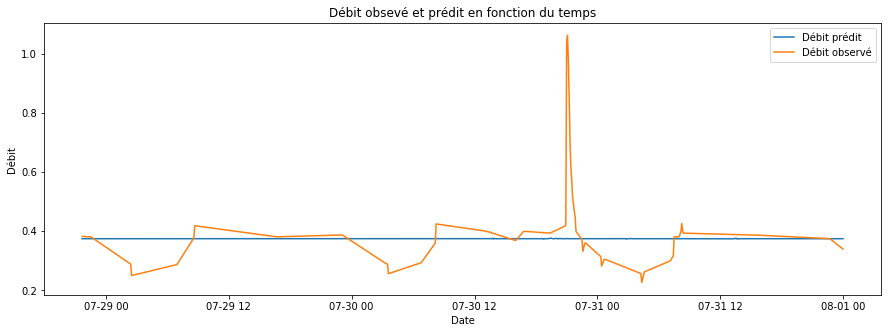

In [21]:

fig, axes = plt.subplots(figsize=(15,5))
#raitement direct d'un fichier Excel

df = pd.read_excel("../Projet_v2/Predit_en_fct_reel.xlsx")

plt.plot(df['date'],prediction)
plt.plot(df['date'], y_test)
plt.xlabel("Date")
plt.ylabel("Débit")
plt.title("Débit obsevé et prédit en fonction du temps")
plt.legend(['Débit prédit', 'Débit observé'])
plt.savefig('Debit_reel_observe.png')

<a id="section_V."></a>
#### V. Références
(1) : https://keras.io/examples/vision/visualizing_what_convnets_learn

(2) : https://colab.research.google.com/drive/

(3) : https://www.tutorialspoint.com/keras/index.htm

(4) : https://keras.io/examples/vision/
